# Project Tasks

1.   ✅ Nenadgledano klasterovanje kompanija na osnovu kategoričkih obeležja 
2.   ❌ Nalaženje sličnih kompanija na osnovu sličnosti embedding vektora kompanije,
izvučenog iz opisa pomoću NLP tehnika -> ZVUCI BEZVEZE, mozda da ne radimo uopste ovo
3.   ✅ Predvidjanje Fairnessa plate na osnovu benefita
4.  ✅ Sentiment analiza komentara o intervjuu i procesu selekcije   (Predikcija statusa ponude na osnovu sentimenta komentara)
5. ⌛ Predikcija labele “težina intervjua” na osnovu ocena u komentarima i labele o statusu
poslovne ponude (da li je korisnik prihvatio, odbio ili nije dobio ponudu za posao)
6. ✅ Predikcija ocene kompanije na osnovu 10 kategoričkih obeležja (tipa uslovi rada,
fleksibilnost, lični razvoj, itd.). Ključni zaključak ovog zadatka će biti analiza značaja
obeležja, kako bi kompanijama omogućili bolju prioretizaciju ovih aspekata
7. ⌛ Eksplorativna analiza podataka


# Dataset loading

In [ ]:
!wget https://github.com/alenm1010/SIAP/raw/master/transform.zip

In [ ]:
!unzip transform.zip

# Data Preview

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Company Ratings

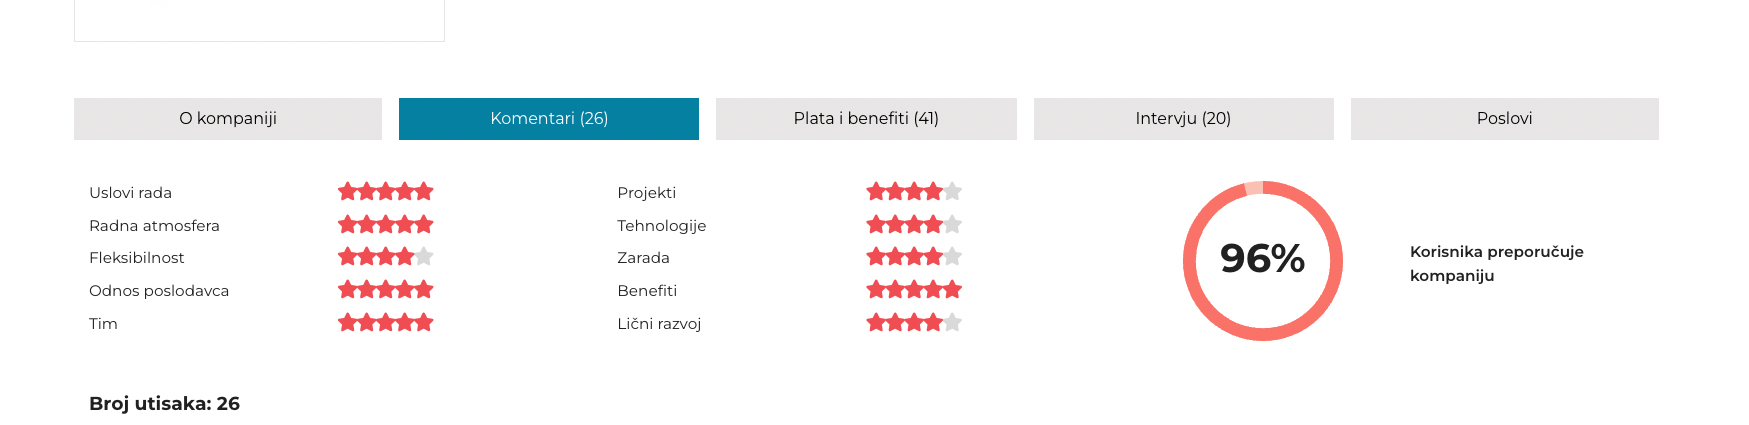

🔑  **Note:** If none of the employees left a rating, we marked a 0 rating. We treat them as missing data, and below is a distribution among columns.



In [ ]:
df_cr = pd.read_csv("./transform/company_ratings.csv", index_col=0)
df_cr = df_cr[df_cr['team_rating'] != 0]
df_cr.head()

,name,team_rating,salary_rating,benefits_rating,projects_rating,flexibility_rating,technologies_rating,work_conditions_rating,working_atmosphere_rating,personal_development_rating,relations_with_employees_rating,company_rating,recommendation_percent
0,two-desperados,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,100
1,iten-engineering,4.000000,3.333333,3.000000,3.333333,4.666667,3.333333,4.000000,3.666667,2.333333,3.000000,3.5,67
2,doob-innovation-studio,3.500000,2.500000,1.500000,3.000000,2.000000,3.000000,2.000000,3.500000,2.500000,2.000000,2.6,0
3,wireless-media,3.964286,2.678571,2.357143,3.285714,3.214286,3.321429,3.285714,3.571429,3.142857,2.928571,3.2,64
4,merkle,3.678571,3.750000,3.964286,2.892857,4.250000,3.035714,4.285714,3.785714,3.000000,3.464286,3.6,64


In [ ]:
(df_cr == 0).astype(int).sum(axis=0)

name                                0
team_rating                         0
salary_rating                       0
benefits_rating                     0
projects_rating                     0
flexibility_rating                  0
technologies_rating                 0
work_conditions_rating              0
working_atmosphere_rating           0
personal_development_rating         0
relations_with_employees_rating     0
company_rating                      0
recommendation_percent             23
dtype: int64

In [ ]:
df_cr.corr().style.background_gradient(cmap='coolwarm', axis=None).set_precision(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """Entry point for launching an IPython kernel.


,team_rating,salary_rating,benefits_rating,projects_rating,flexibility_rating,technologies_rating,work_conditions_rating,working_atmosphere_rating,personal_development_rating,relations_with_employees_rating,company_rating,recommendation_percent
team_rating,1.000,0.705,0.704,0.729,0.787,0.721,0.808,0.890,0.728,0.798,0.858,0.789
salary_rating,0.705,1.000,0.832,0.818,0.773,0.810,0.820,0.742,0.801,0.821,0.896,0.763
benefits_rating,0.704,0.832,1.000,0.768,0.819,0.771,0.847,0.783,0.827,0.841,0.905,0.771
projects_rating,0.729,0.818,0.768,1.000,0.793,0.875,0.806,0.793,0.848,0.823,0.905,0.777
flexibility_rating,0.787,0.773,0.819,0.793,1.000,0.797,0.861,0.849,0.810,0.876,0.918,0.831
technologies_rating,0.721,0.810,0.771,0.875,0.797,1.000,0.779,0.752,0.810,0.782,0.888,0.748
work_conditions_rating,0.808,0.820,0.847,0.806,0.861,0.779,1.000,0.890,0.839,0.926,0.942,0.835
working_atmosphere_rating,0.890,0.742,0.783,0.793,0.849,0.752,0.890,1.000,0.805,0.900,0.920,0.855
personal_development_rating,0.728,0.801,0.827,0.848,0.810,0.810,0.839,0.805,1.000,0.866,0.917,0.836
relations_with_employees_rating,0.798,0.821,0.841,0.823,0.876,0.782,0.926,0.900,0.866,1.000,0.950,0.872


In [ ]:
x_columns = list(df_cr.iloc[:, 1:11])
y_column = 'company_rating'
X_train_cr, X_test_cr, y_train_cr, y_test_cr = train_test_split(df_cr.loc[:, x_columns].to_numpy(), df_cr[y_column].to_numpy())
x_columns

['team_rating',
 'salary_rating',
 'benefits_rating',
 'projects_rating',
 'flexibility_rating',
 'technologies_rating',
 'work_conditions_rating',
 'working_atmosphere_rating',
 'personal_development_rating',
 'relations_with_employees_rating']

## Interview Ratings 

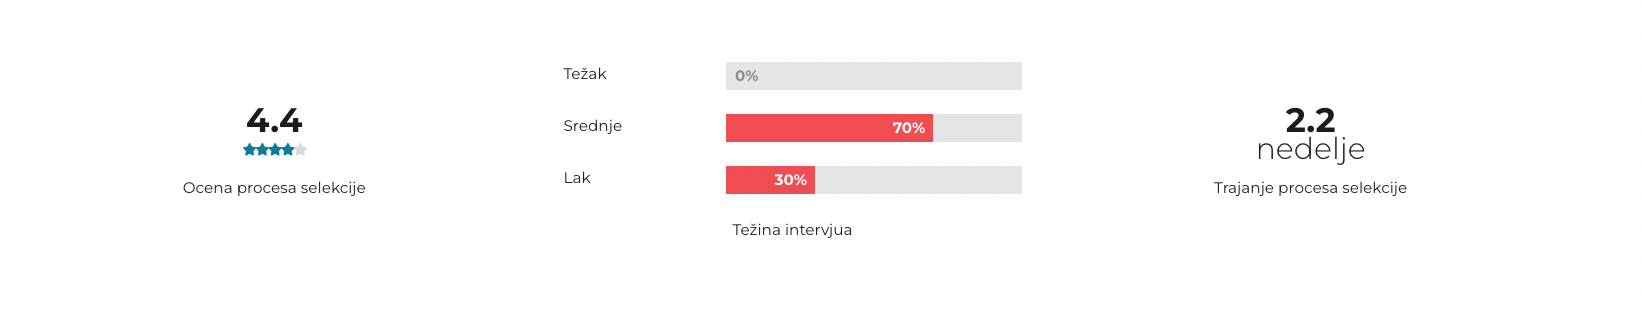

🔑  **Note:** If none of the employees left a rating, we marked a 0 rating. We treat them as missing data, and below is a distribution among columns.



In [ ]:
df_ir = pd.read_csv("./transform/interview_ratings.csv")
df_ir

Unnamed: 0            0
name                  0
interview_rating      0
selection_duration    0
easy_percent          0
medium_percent        0
hard_percent          0
dtype: int64

In [ ]:
(df_ir == 0).astype(int).sum(axis=0)

Unnamed: 0              1
name                    0
interview_rating       63
selection_duration     63
easy_percent          135
medium_percent        144
hard_percent          327
dtype: int64

In [ ]:
df_ir.corr().style.background_gradient(cmap='coolwarm', axis=None).set_precision(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """Entry point for launching an IPython kernel.


,Unnamed: 0,interview_rating,selection_duration,easy_percent,medium_percent,hard_percent
Unnamed: 0,1.000,-0.003,-0.007,0.090,-0.068,0.113
interview_rating,-0.003,1.000,0.333,0.208,0.558,0.082
selection_duration,-0.007,0.333,1.000,0.322,0.196,0.017
easy_percent,0.090,0.208,0.322,1.000,-0.475,-0.178
medium_percent,-0.068,0.558,0.196,-0.475,1.000,-0.067
hard_percent,0.113,0.082,0.017,-0.178,-0.067,1.000


## Company Benefits

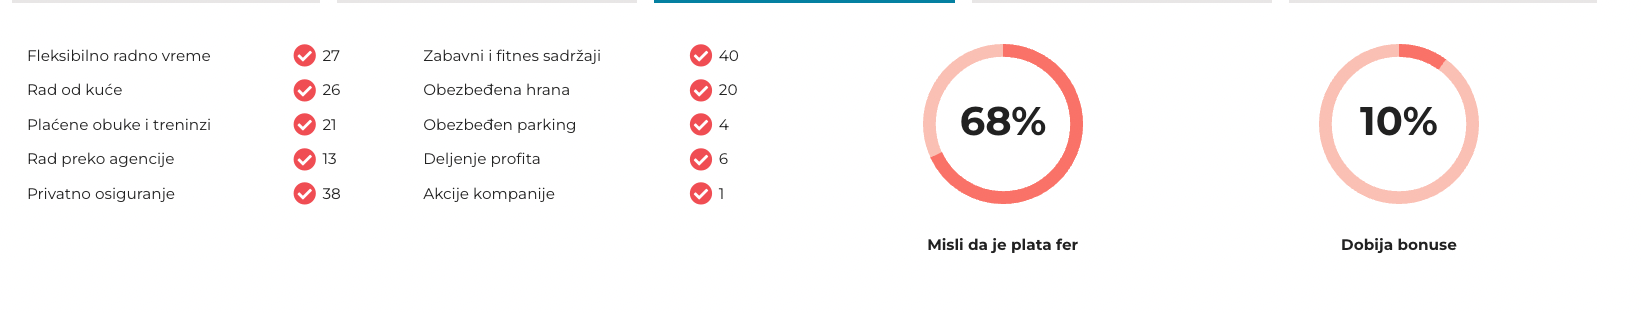

In [ ]:
df_cb = pd.read_csv("./transform/benefits.csv")
df_cb.head()

,Unnamed: 0,company,flex_hours,remote_work,paid_courses,agency,insurance,entertainment,lunch,parking_lot,profit_sharing,company_shares,review_count,considers_fair_salary,gets_bonuses,avg_rating,positions
0,0,iten-engineering,2.0,1.0,1.0,NaN,2.0,2.0,2.0,NaN,NaN,NaN,2,100%,100%,3.5,[{'position_name': 'Software Developer (Medior...
1,1,doob-innovation-studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,50%,0%,2.6,"[{'position_name': 'Technical Lead (Medior)', ..."
2,2,wireless-media,8.0,12.0,6.0,3.0,14.0,NaN,3.0,NaN,NaN,NaN,17,24%,0%,3.2,"[{'position_name': 'QA Specialist (Junior)', '..."
3,3,merkle,20.0,23.0,14.0,NaN,24.0,15.0,NaN,NaN,NaN,NaN,24,58%,50%,3.6,[{'position_name': 'Software Engineer (Senior)...
4,4,sks365,6.0,3.0,4.0,3.0,7.0,7.0,2.0,NaN,1.0,NaN,8,38%,100%,3.5,"[{'position_name': 'QA Specialist (Medior)', '..."


In [ ]:
df_cb.isna().sum()

Unnamed: 0                 0
company                    0
flex_hours                40
remote_work               40
paid_courses              87
agency                   195
insurance                 98
entertainment            105
lunch                    192
parking_lot              168
profit_sharing           260
company_shares           248
review_count               0
considers_fair_salary      0
gets_bonuses               0
avg_rating                 0
positions                  0
dtype: int64

In [ ]:
df_cb.corr().style.background_gradient(cmap='coolwarm', axis=None).set_precision(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """Entry point for launching an IPython kernel.


,Unnamed: 0,flex_hours,remote_work,paid_courses,agency,insurance,entertainment,lunch,parking_lot,profit_sharing,company_shares,review_count,avg_rating
Unnamed: 0,1.000,0.076,0.071,0.049,-0.028,0.097,0.054,0.107,0.094,-0.159,0.165,0.066,-0.001
flex_hours,0.076,1.000,0.950,0.917,0.803,0.945,0.919,0.541,0.662,0.337,0.336,0.951,0.031
remote_work,0.071,0.950,1.000,0.937,0.772,0.960,0.860,0.418,0.698,0.314,0.280,0.966,0.018
paid_courses,0.049,0.917,0.937,1.000,0.772,0.937,0.878,0.363,0.689,0.422,0.248,0.938,0.023
agency,-0.028,0.803,0.772,0.772,1.000,0.738,0.849,0.304,0.462,0.297,-0.077,0.793,0.101
insurance,0.097,0.945,0.960,0.937,0.738,1.000,0.877,0.461,0.683,0.308,0.295,0.977,-0.014
entertainment,0.054,0.919,0.860,0.878,0.849,0.877,1.000,0.579,0.632,0.330,0.264,0.879,0.044
lunch,0.107,0.541,0.418,0.363,0.304,0.461,0.579,1.000,0.204,0.338,0.163,0.484,0.059
parking_lot,0.094,0.662,0.698,0.689,0.462,0.683,0.632,0.204,1.000,0.186,0.020,0.662,0.057
profit_sharing,-0.159,0.337,0.314,0.422,0.297,0.308,0.330,0.338,0.186,1.000,-0.078,0.323,0.105


## Company Positions

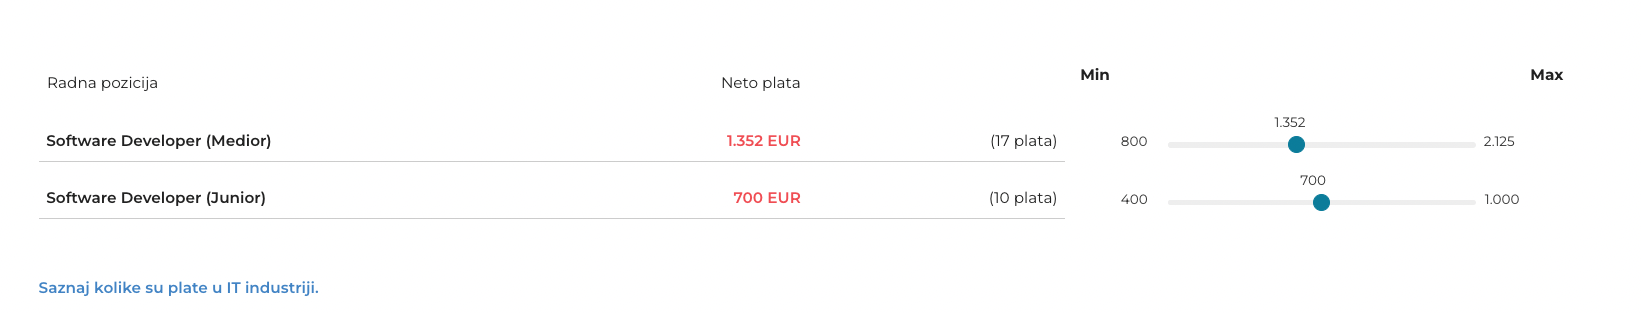

In [ ]:
df_cp = pd.read_csv("./transform/benefits_positions.csv")
df_cp

,Unnamed: 0,company,position_name,salary_min,salary_max,salary_avg
0,0,iten-engineering,Software Developer (Medior),NaN,NaN,1.341 EUR
1,1,iten-engineering,QA Specialist (Junior),NaN,NaN,541 EUR
2,2,doob-innovation-studio,Technical Lead (Medior),NaN,NaN,3.000 EUR
3,3,doob-innovation-studio,Data Science Engineer (Junior),NaN,NaN,650 EUR
4,4,wireless-media,QA Specialist (Junior),400.0,600.0,462 EUR
...,...,...,...,...,...,...
1323,1323,fis,Test Engineer (Medior),NaN,NaN,1.500 EUR
1324,1324,fis,IT Consultant (Medior),NaN,NaN,1.800 EUR
1325,1325,fis,Software Developer (Junior) / Praksa,NaN,NaN,450 EUR
1326,1326,fis,QA Specialist (Medior),NaN,NaN,1.400 EUR


In [ ]:
df_cp.isna().sum()

Unnamed: 0         0
company            0
position_name      0
salary_min       934
salary_max       934
salary_avg         0
dtype: int64

## Company Ratings Comments



In [ ]:
df_cc = pd.read_csv('./transform/comments.csv')
df_cc.head()
df_cc.isna().sum()

Unnamed: 0               0
grade                    0
date                     0
title                    0
positive                 0
negative                 0
projects              1495
role                     0
current_employment       0
full_part                0
left_stays               0
company                  0
dtype: int64

In [ ]:
df_cc["role"].value_counts()

Software Developer (Medior)           520
Software Developer (Junior)           348
Software Developer (Senior)           266
Korisnik nije naveo radnu poziciju    250
Software Engineer (Medior)            196
                                     ... 
Software Architect (Junior)             1
Game Producer (Medior)                  1
Animator (Junior)                       1
CTO (Medior)                            1
Animator (Senior)                       1
Name: role, Length: 122, dtype: int64

## Company Interview Comments

In [ ]:
df_ic = pd.read_csv("./transform/interview-comments.csv")
df_ic.head()
df_ic.isna().sum()

Unnamed: 0                 0
grade                      0
date                       0
title                      0
hr_interview               0
technical_interview        0
offer_refusal_reason    1719
offer                      0
interview_year             0
company                    0
dtype: int64

✋ Saznaj koja je distribucija Prihvatio vs Odbio ponudu!

Labele:
* **0** - nije dobio ponudu
* **1** - odbio ponudu
* **2** - prihvatio ponudu

In [ ]:
def label_offer(offer_text):
  if "prihvatio" in offer_text:
    return 2
  elif "odbio" in offer_text:
    return 1
  elif "nije dobio" in offer_text:
    return 0

In [ ]:
df_ic["offer_status"] = df_ic["offer"].apply(lambda x: label_offer(x))
df_ic["offer_status"].value_counts()

2    952
0    730
1    174
Name: offer_status, dtype: int64

In [ ]:
df_ic["offer"].value_counts()

Software Developer (prihvatio ponudu)     302
Software Developer (nije dobio ponudu)    251
Software Engineer (prihvatio ponudu)      157
QA Specialist (prihvatio ponudu)           92
Ostalo (nije dobio ponudu)                 92
                                         ... 
Technical Lead (odbio ponudu)               1
Technical writer (prihvatio ponudu)         1
Solution Architect (odbio ponudu)           1
Software Architect (prihvatio ponudu)       1
Program Manager (nije dobio ponudu)         1
Name: offer, Length: 96, dtype: int64

# Tasks

## Task 1: Company Ratings clustering 

In [ ]:
df_cr

,name,team_rating,salary_rating,benefits_rating,projects_rating,flexibility_rating,technologies_rating,work_conditions_rating,working_atmosphere_rating,personal_development_rating,relations_with_employees_rating,company_rating,recommendation_percent
0,two-desperados,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,100
1,iten-engineering,4.000000,3.333333,3.000000,3.333333,4.666667,3.333333,4.000000,3.666667,2.333333,3.000000,3.5,67
2,doob-innovation-studio,3.500000,2.500000,1.500000,3.000000,2.000000,3.000000,2.000000,3.500000,2.500000,2.000000,2.6,0
3,wireless-media,3.964286,2.678571,2.357143,3.285714,3.214286,3.321429,3.285714,3.571429,3.142857,2.928571,3.2,64
4,merkle,3.678571,3.750000,3.964286,2.892857,4.250000,3.035714,4.285714,3.785714,3.000000,3.464286,3.6,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,softmetrix,4.800000,4.600000,4.200000,4.400000,4.800000,4.400000,4.000000,4.600000,4.200000,4.200000,4.4,80
385,mangonel,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,100
386,quectel,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.1,50
387,prodyna,4.333333,4.333333,4.833333,4.333333,4.333333,4.166667,4.833333,4.000000,4.500000,4.833333,4.5,100


### PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(2)
df_cr_pca = pca.fit_transform(df_cr.loc[:, x_columns].to_numpy())
df_cr_pca.shape, df_cr.loc[:, x_columns].shape

((385, 2), (385, 10))

In [ ]:
pca.explained_variance_ratio_

array([0.83403064, 0.04209932])

### KMeans + Elbow Method

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_cr.loc[:, x_columns])
    distortions.append(kmeanModel.inertia_)

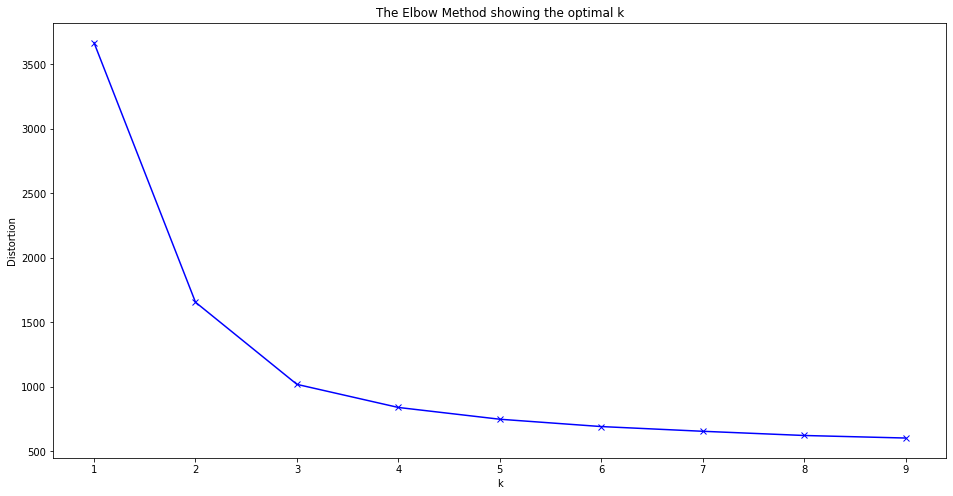

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(df_cr.loc[:, x_columns])

#### Results Plot

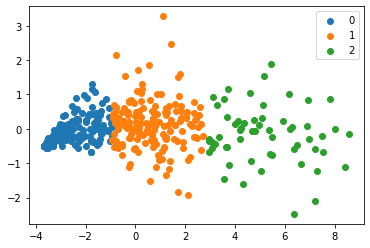

In [ ]:
import matplotlib.pyplot as plt
 

u_labels = np.unique(labels)

 
for i in u_labels:
    plt.scatter(df_cr_pca[labels == i , 0] , df_cr_pca[labels == i , 1] , label = i)

plt.legend()
plt.show()

In [ ]:
df_cr_pca.max()

8.554749609244807

In [ ]:
# Selecting rows that have COMPONENT_1 > 10

indices = [i[0] for i in np.argwhere((df_cr_pca[:, 0] < -1) )]
df_cr_labels = df_cr.copy() 
df_cr_labels["labels"] = labels 
df_cluster2 = df_cr_labels[(df_cr_labels["labels"] == 1) & (df_cr_labels["company_rating"] > 4.6)]
df_cluster2.describe()

,team_rating,salary_rating,benefits_rating,projects_rating,flexibility_rating,technologies_rating,work_conditions_rating,working_atmosphere_rating,personal_development_rating,relations_with_employees_rating,company_rating,recommendation_percent,labels
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### GMM

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gm = GaussianMixture(n_components=3, random_state=42)


In [ ]:
labels = gm.fit_predict(df_cr_pca)

In [ ]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
    
    return labels

In [ ]:
gmm = GaussianMixture(n_components=3, random_state=42, covariance_type="full")

#### Results Plot

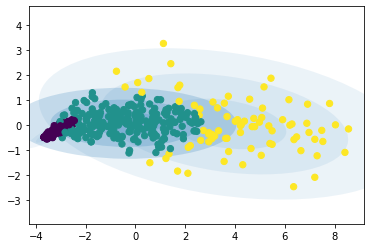

In [ ]:
labels = plot_gmm(gmm, df_cr_pca)

In [ ]:
indices = [i[0] for i in np.argwhere((df_cr_pca[:, 0] < -1) )]
len(indices), df_cr.iloc[indices].median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


(157,
 team_rating                          5.000
 salary_rating                        4.600
 benefits_rating                      4.500
 projects_rating                      4.500
 flexibility_rating                   4.875
 technologies_rating                  4.625
 work_conditions_rating               5.000
 working_atmosphere_rating            5.000
 personal_development_rating          4.600
 relations_with_employees_rating      4.900
 company_rating                       4.700
 recommendation_percent             100.000
 dtype: float64)

## Task 3: Salary fairness prediction based on company's benefits

In [ ]:
def load_data():
  df_cb = pd.read_csv("./transform/benefits.csv")
  df_cb = df_cb.drop('positions', axis=1)
  df_cb = df_cb.drop('company', axis=1)
  df_cb = df_cb.drop('Unnamed: 0', axis=1)

  columns = ['flex_hours', 'remote_work', 'paid_courses', 'agency', 'insurance',
          'entertainment', 'lunch', 'parking_lot', 'profit_sharing', 'company_shares']

  for c in columns:
    df_cb[c] = df_cb[c].fillna(0)
    df_cb[c] = round(df_cb[c]/df_cb['review_count'],2)

  df_cb["considers_fair_salary"] = df_cb["considers_fair_salary"].apply(lambda x: int(x.replace("%", ""))/100)
  df_cb["gets_bonuses"] = df_cb["gets_bonuses"].apply(lambda x: int(x.replace("%", ""))/100)

  return df_cb

In [ ]:
x_cols1 = ['flex_hours', 'remote_work', 'paid_courses', 'agency', 'insurance',
         'entertainment', 'lunch', 'parking_lot', 'profit_sharing', 'company_shares', 
         'review_count', 'gets_bonuses']

x_cols2 = ['flex_hours', 'remote_work', 'paid_courses', 'agency', 'insurance',
         'entertainment', 'lunch', 'parking_lot', 'profit_sharing', 'company_shares', 
         'gets_bonuses']

x_cols3 = ['flex_hours', 'remote_work', 'paid_courses', 'agency', 'insurance',
         'entertainment', 'lunch', 'parking_lot', 'profit_sharing', 'company_shares', ]

x_cols4 = ['flex_hours', 'remote_work', 'paid_courses', 'agency', 'insurance',
         'entertainment', 'lunch', 'parking_lot', 'profit_sharing', 'company_shares']

x_cols5 = ['flex_hours', 'remote_work', 'paid_courses', 'insurance',
         'entertainment', 'review_count', 'gets_bonuses']

x_cols6 = ['flex_hours', 'remote_work', 'paid_courses', 'insurance',
         'entertainment']

x_cols7 = ['flex_hours', 'remote_work', 'paid_courses', 'insurance']

x_cols8 = ['flex_hours','remote_work','paid_courses','insurance','gets_bonuses']

y_column = 'considers_fair_salary'

df = load_data()

X_train, X_test, y_train, y_test = train_test_split(df.loc[:, x_cols7].to_numpy(), 
                                                    df[y_column].to_numpy(),
                                                    train_size=0.80,
                                                    random_state=10)

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(3)

In [ ]:
param_grid = {
                'n_estimators': [4, 8, 16, 24, 32, 64, 128],
                'max_depth': [2, 4, 8, 16, 24, 32]
             }

#isprobani SVR(), XGBRegressor(), LinearRegression()

clf = RandomForestRegressor(random_state=10)

grid_clf = GridSearchCV(clf, param_grid, cv=10)

best_clf = grid_clf.fit(X_train, y_train)

best_clf = grid_clf.best_estimator_
y_predict = best_clf.predict(X_test)

mean_squared_error(y_predict, y_test)

0.10867508547109729

Text(0.5, 1.0, 'Feature importance')

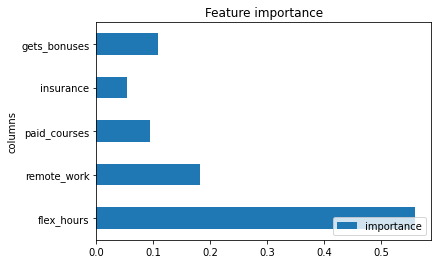

In [ ]:
importances = best_clf.feature_importances_
forest_importances = pd.DataFrame({'columns': x_cols7, 'importance':importances})

ax = forest_importances.plot.barh(x='columns', y='importance')
ax.legend(loc=4, prop={'size': 10})
ax.set_title("Feature importance")

## Task 4: Interview Comments Sentiment Analysis

In [ ]:
!pip install simpletransformers


### Model Loading

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

bertic = "bert-base-multilingual-uncased-sentiment" #"classla/bcms-bertic"


tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
tokenizer.truncation = True

model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

In [ ]:
classifier(["Nista posebno iskreno. Okej", "Promasio sam firmu, trebao sam zaobici", "Mislim da su skroz fer sto se tice plata, nista specijalno", "Jedna od boljih u Novom Sadu"])

[{'label': '2 stars', 'score': 0.3759593963623047},
 {'label': '1 star', 'score': 0.4019657075405121},
 {'label': '2 stars', 'score': 0.44125425815582275},
 {'label': '5 stars', 'score': 0.5394486784934998}]

In [ ]:
classifier(["Što se tiče samog prvog kruga tj. HR intervju-a, tu imam sve pohvale za devojku koja radi taj deo.\nOstali krugovi su neprijatni i veštački."])

[{'label': '2 stars', 'score': 0.30099397897720337}]

In [ ]:
classifier(['Drugi krug je najčešće u vidu zadatka za koji vam treba prevodilac da bi ste shvatili sta je pisac hteo da kaže. Fokus je na testovima iz kojih je lakse da se zaključi šta treba da se uradi.\
Nakon toga neko treba da vam pregleda zadatak i ostavi neki komentar na sam deo koja o kojem bi trebalo izmedju ostalog da razgovarate na sledećem koraku razgovora.\
Treći krug je razgovor o zadatku  (gde se svodi na to da je trebalo negde staviti mapu umesto liste ili slicne neke kritike koje nisu argumentovane ) i sam tehnički razgovor.\
Tu vam postavljaju pitanja npr. kako bi ste opisali nekome ko nije programer sta su lambda funkcije u javi? ili neka pitanja sa faksa npr. Koje su normalne forma za relacione baze? itd.\
Pitanja uopste nisu u skladu sa onim sto cete raditi jer su im jHipster generisani projekti u glavnom, a drugo dok vas direktor ne ispita sta je sve naumio necete zavrsiti razgovor, pritom je neprijatan.'])

[{'label': '3 stars', 'score': 0.4569416046142578}]

### Fine Tuning 

In [ ]:
df_ic

,Unnamed: 0,grade,date,title,hr_interview,technical_interview,offer_refusal_reason,offer,interview_year,company,offer_status
0,0,1.0,18.10.2021,Izuzetno neprijatno,Što se tiče samog prvog kruga tj. HR intervju-...,Drugi krug je najčešće u vidu zadatka za koji ...,Poslednji krug razgovora je da vam se spusti v...,Software Engineer (odbio ponudu),Software Engineer (odbio ponudu),3ap,1
1,1,2.0,26.10.2019,Neprijatno,Intervju sa HR-om je bio ok i prijatan sve do ...,Korisnik nije naveo iskustvo sa tehničkog inte...,NaN,Software Engineer (nije dobio ponudu),Software Engineer (odbio ponudu),3ap,0
2,2,5.0,26.01.2022,Dobro iskustvo,"Prijatno iskustvo, HR iz Amerike. Nije bilo on...",Pricao sam sa komunikativnom i nasmejanom osob...,NaN,Ostalo (prihvatio ponudu),Intervju iz 2021. godine,3biilsoft-,2
3,3,5.0,13.10.2021,Koretno,"Ljubazan HR, proces je dinamičan, ne traje pre...",Prvi intervju je bio da ljudima iz beograda. H...,NaN,QA Specialist (prihvatio ponudu),Intervju iz 2021. godine,3biilsoft-,2
4,4,4.0,08.04.2021,Prijatna atmosfera i konkretna pitanja,Korisnik nije naveo iskustvo sa HR intervjua,Online intervju je bio zakazan ubrzo posle apl...,NaN,QA Specialist (nije dobio ponudu),Intervju iz 2021. godine,3biilsoft-,0
...,...,...,...,...,...,...,...,...,...,...,...
1851,1851,5.0,09.04.2020,Pozitivno drugačiji,Prvo je usledio telefonski poziv u trajanju od...,Obavljen u prisustvu HRa. 3h zakazanog vremena...,NaN,Administration (prihvatio ponudu),Intervju iz 2022. godine,zuhlke-engineering,2
1852,1852,3.0,09.12.2019,Software Developer (nije dobio ponudu),HR intervju telefonom. Iskreno mislim da bi tr...,"Prvi tehnicki intervju telefonom, kao neka vrs...",NaN,Software Developer (nije dobio ponudu),Intervju iz 2022. godine,zuhlke-engineering,0
1853,1853,1.0,28.08.2019,Embedded SW Developer,Nije bio,Najdetaljniji intervju koji sam imao u životu....,NaN,Software Engineer (nije dobio ponudu),Intervju iz 2022. godine,zuhlke-engineering,0
1854,1854,5.0,24.07.2019,Prijatno i poučno iskustvo,"U mom slučaju, sa HR-om sam pre tehničkog inte...","Tri kruga. Prvi telefonski, sat vremena, zanim...",NaN,Software Engineer (prihvatio ponudu),Intervju iz 2022. godine,zuhlke-engineering,2


### Sentiment Analysis of HR and Technical Interviews comments

In [ ]:
hr_diff, tech_diff = [], []
ic_total = len(df_ic)

In [ ]:
problem_indices = []


for index, row in df_ic.iterrows():
  try:
    sentiment = classifier([row["hr_interview"], row["technical_interview"]])
    hr_diff.append((int(row['grade']) - int(sentiment[0]['label'][0])) ** 2)
    tech_diff.append((int(row['grade']) - int(sentiment[1]['label'][0])) ** 2)
  
  except Exception as e:
    print("skipped ", index, e)
    problem_indices.append(index)
    


problem_indices

Token indices sequence length is longer than the specified maximum sequence length for this model (615 > 512). Running this sequence through the model will result in indexing errors


skipped  75 The size of tensor a (615) must match the size of tensor b (512) at non-singleton dimension 1
skipped  100 The size of tensor a (730) must match the size of tensor b (512) at non-singleton dimension 1
skipped  114 The size of tensor a (525) must match the size of tensor b (512) at non-singleton dimension 1
skipped  126 The size of tensor a (526) must match the size of tensor b (512) at non-singleton dimension 1
skipped  192 The size of tensor a (563) must match the size of tensor b (512) at non-singleton dimension 1
skipped  251 The size of tensor a (687) must match the size of tensor b (512) at non-singleton dimension 1
skipped  354 The size of tensor a (539) must match the size of tensor b (512) at non-singleton dimension 1
skipped  536 The size of tensor a (646) must match the size of tensor b (512) at non-singleton dimension 1
skipped  549 The size of tensor a (605) must match the size of tensor b (512) at non-singleton dimension 1
skipped  584 The size of tensor a (609

[75,
 100,
 114,
 126,
 192,
 251,
 354,
 536,
 549,
 584,
 604,
 711,
 791,
 825,
 906,
 948,
 1002,
 1037,
 1038,
 1065,
 1146,
 1152,
 1157,
 1175,
 1205,
 1206,
 1265,
 1336,
 1382,
 1485,
 1534,
 1676,
 1757,
 1758,
 1793,
 1838]

In [ ]:
df_ic.iloc[problem_indices]["hr_interview"]

75      Veoma prijatan intervju, obavljen u prostorija...
100     HR je za svaku pohvalu, ispričali smo se, sve ...
114     Telefonski razgovor, gde vam postavljaju neka ...
126     Sve pohvale za HR tim koji se trudi da nadje s...
192     Prijavio sam se za poziciju "Site Reliability ...
251     Momak iz HR me je kontaktirao preko Linkedina....
354     Od prvog kontakta sve je bilo na visokom profe...
536     Screening sam imao u vidu telefonskog razgovor...
549     Krajnje prijatno i profesionalno. I sama sam p...
584               - Nisam stigao do ovog kruga razgovora.
604     - U pitanju je potpuno remote pozicija za DevO...
711          Korisnik nije naveo iskustvo sa HR intervjua
791     -Pozicija je raspisana za Suboticu i od svakog...
825     Prvi razgovor obavljen je sa HR menadžerkom. R...
906     - Nakon mesec dana sam poslao propratni mejl o...
948     Za HR-a imam samo reči hvale! Devojka je stvar...
1002    -Pozvan sam na HR intervju preko Microsoft Tea...
1037       HR 

In [ ]:
df_ic.iloc[problem_indices]["technical_interview"]

75      Nakon usmenog intervjua, slijedi tehnički test...
100     Ufff ovako, osećam se kao da sam poručio nešto...
114     Sastanak pomeran dva puta zbog toga što niko o...
126     Drugi krug, razgovoro sa Blue Grid timom je de...
192     Korisnik nije naveo iskustvo sa tehničkog inte...
251     Opis: Opste rasulo\nJedan tim lead i 2 test in...
354     Razgovor je bio remote video poziv sa dvojicom...
536     Prvi korak u intervjuu je bio detaljan hronolo...
549     Tehnički deo se sastojao iz 4 koraka i ovo je ...
584     - Predstavnica HR tima me je direktno pozvala ...
604     - Tehnički razgovor je prošao u prilično opušt...
711     Iako se HR hvalila velikim timom dizajnera koj...
791     -Ovaj deo razgovora je obavljen takođe na Skaj...
825     Tehnički razgovor je protekao u prilično opušt...
906              - Ovo je ujedno bio i tehnički razgovor.
948     Tehnički intervju se sastoji iz dva dela:\n- T...
1002                       -Nisam stigao do ovog kruga.\n
1037    За поз

In [ ]:
hr_diff

[1,
 1,
 1,
 4,
 9,
 0,
 0,
 1,
 4,
 0,
 0,
 1,
 4,
 9,
 0,
 9,
 1,
 4,
 1,
 1,
 0,
 1,
 0,
 0,
 9,
 4,
 1,
 1,
 0,
 16,
 0,
 0,
 4,
 1,
 1,
 1,
 0,
 16,
 0,
 0,
 16,
 16,
 4,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 9,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 16,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 4,
 0,
 4,
 9,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 9,
 0,
 0,
 1,
 9,
 0,
 1,
 0,
 4,
 1,
 9,
 0,
 4,
 1,
 1,
 0,
 0,
 4,
 0,
 0,
 9,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 16,
 4,
 9,
 0,
 16,
 1,
 0,
 4,
 1,
 1,
 0,
 0,
 4,
 0,
 1,
 0,
 16,
 1,
 0,
 9,
 9,
 0,
 9,
 4,
 0,
 1,
 4,
 0,
 0,
 1,
 0,
 1,
 1,
 9,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 4,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 16,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 4,
 9,
 0,
 16,
 4,
 16,
 1,
 0,
 9,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 9,
 1,
 1,
 9,
 0,
 0,
 4,
 9,
 1,
 0,
 0,
 0,
 4,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 4,
 4,
 4,
 1,
 1,
 4,
 0,
 1,
 4,
 0,
 0,
 1,
 0,
 9,
 4,
 9,
 0,
 1,
 1,
 1,
 

#### MSE of HR Interview

In [ ]:
sum(hr_diff) / (ic_total - len(problem_indices))

2.7384615384615385

#### MSE of Technical Interview

In [ ]:
sum(tech_diff) /  (ic_total - len(problem_indices))

2.746153846153846

In [ ]:
2.746153846153846 ** 1/2, 2.7384615384615385 ** 1/2

(1.373076923076923, 1.3692307692307693)

#### T test

In [ ]:
from scipy import stats as st

res = st.ttest_ind(a=hr_diff, b=tech_diff, equal_var=True)
res

Ttest_indResult(statistic=-0.05638468094482793, pvalue=0.9550384567369854)

## Task 5: Prediction of Selection Process Rating

predikcija labele “težina intervjua” na osnovu ocena u komentarima i labele o statusu
poslovne ponude (da li je korisnik prihvatio, odbio ili nije dobio ponudu za posao)

In [ ]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

stopwords = ['a','ako','ali','bi','bih','bila','bili','bilo','bio','bismo','biste','biti','bimo','da','do','duž','duz','ga','hoće','hoćemo','hoćete','hoćeš','hoću','hoce','hocemo','hocete','hoces','hocu','i','iako','ih','ili','iz','ja','je','jedna','jedne','jedno','jer','jesam','jesi','jesmo','jest','jeste','jesu','jim','joj','još','jos','ju','kada','kako','kao','koja','koje','koji','kojima','koju','kroz','li','me','mene','meni','mi','mimo','moj','moja',	'moje','mu','na','nad','nakon','nam','nama','nas','naš','naša','naše','našeg','nas','nasa','nase','naseg','ne','nego','neka','neki','nekog','neku','nema','neko','neće','nećemo','nećete','nećeš','neću','nešto','nece','necemo','necete','neces','necu','nesto','ni','nije','nikoga','niko','nisam','nisi','nismo','niste','nisu','njega','njegov','njegova','njegovo','njemu','njen','njena','njeno','njih','njihov','njihova','njihovo','njim','njima','njoj','nju','no','o','od','odmah','on','ona','oni','ono','ova','pa','pak','po','pod','pored','pre','s','sa','sam','samo','se','sebe','sebi','si','smo','ste','su','sve','svi','svog','svoj','svoja','svoje','svom','ta','tada','taj','tako','te','tebe','tebi','ti','to','toj','tome','tu','tvoj','tvoja','tvoje','u','uz','vam','vama','vas','vaš','vaša','vasa','vaše','vase','već','vec','vi','vrlo','za','zar','će','ce','ćemo','cemo','ćete','cete','ćeš','ces','ću','cu','što','sto','za','je','itd','od','do']

df_ir = pd.read_csv("/content/transform/interview_ratings.csv")
#df_ir.head()

d = {}

for index, row in df_ir.iterrows():
  i = max(row['easy_percent'], row['medium_percent'], row['hard_percent'])
  if i == 0:
    continue
  if row['easy_percent'] == i:
    d[row['name']] = "easy"
  elif row['medium_percent'] == i:
    d[row['name']] = "medium"
  elif row['hard_percent'] == i:
    d[row['name']] = "hard"
    
def label_offer(offer_text):
  if "prihvatio" in offer_text:
    return "prihvatio"
  elif "odbio" in offer_text:
    return "odbio"
  elif "nije dobio" in offer_text:
    return "nije_dobio"

def difficulty(company):
  if company not in d:
    return ""
  return d[company]

def remove_stopwords(words):
  if not words:
    return ''
  tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                                reduce_len=True)
  words_tokens = tokenizer.tokenize(words)

  words_clean = []
  for word in words_tokens:
    if (word not in stopwords and word not in string.punctuation):  # remove punctuation
      words_clean.append(word)
  
  return ' '.join(words_clean)

df_ic = pd.read_csv('/content/transform/interview-comments.csv')
df_ic["offer_status"] = df_ic["offer"].apply(lambda x: label_offer(x))
df_ic = df_ic.rename(columns={"company": "interview_difficulty"})

df_ic["interview_difficulty"] = df_ic["interview_difficulty"].apply(lambda x: difficulty(x))
df_ic['technical_interview'] = df_ic["technical_interview"].apply(lambda x: remove_stopwords(x))
df_ic['hr_interview'] = df_ic["hr_interview"].apply(lambda x: remove_stopwords(x))

df_ic = df_ic.drop('title', axis=1)
#df_ic = df_ic.drop('hr_interview', axis=1)
#df_ic = df_ic.drop('technical_interview', axis=1)
df_ic = df_ic.drop('offer_refusal_reason', axis=1)
df_ic = df_ic.drop('interview_year', axis=1)
df_ic = df_ic.drop('offer', axis=1)
df_ic = df_ic.drop('date', axis=1)
df_ic = df_ic.drop('Unnamed: 0', axis=1)

#dm = pd.get_dummies(df_ic["interview_difficulty"]) 
#df_ic = pd.concat([df_ic, pd.get_dummies(df_ic["interview_difficulty"]) ], axis = 1)
y = pd.get_dummies(df_ic["interview_difficulty"])
df_ic = df_ic.drop('interview_difficulty', axis=1)

offerstatusdummies = pd.get_dummies(df_ic["offer_status"])
df_ic = df_ic.drop('offer_status', axis=1)
df_ic = pd.concat([df_ic, offerstatusdummies], axis = 1)

x = df_ic

#y.head()
#df_ic['interview_difficulty'].value_counts()

X_train, X_test, y_train, y_test = train_test_split(x.to_numpy(), 
                                                    y.to_numpy(),
                                                    train_size=0.80,
                                                    random_state=10)

def get_tfidf_word_embedding(train, test):
    vectorizer = TfidfVectorizer()
    train_tfidf = vectorizer.fit_transform(train)
    test_tfidf = vectorizer.transform(test)
    return train_tfidf.toarray(), test_tfidf.toarray()

X_train_hr, X_test_hr = get_tfidf_word_embedding(X_train[:, 1], X_test[:, 1])
X_train_th, X_test_th = get_tfidf_word_embedding(X_train[:, 2], X_test[:, 2])

X_train = np.delete(X_train, 1, 1)
X_train = np.delete(X_train, 1, 1)

X_test = np.delete(X_test, 1, 1)
X_test = np.delete(X_test, 1, 1)

# prihvatio     952
# nije_dobio    730
# odbio         174

In [ ]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='f1_micro'):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=True
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

parameters = {
      "estimator__dual": [False, True],
      "estimator__C": [1,4,8,10,100],
      "estimator__fit_intercept": [True, False],
}
model = OneVsRestClassifier(XGBClassifier(), n_jobs=-1)


fitted_model = model.fit(X_train, y_train)
pred = model.predict(X_test)

# model_hr = OneVsRestClassifier(XGBClassifier(), n_jobs=-1)
# fitted_model_hr = model_hr.fit(X_train_hr, y_train)
# pred_hr = model_hr.predict(X_test_hr)

# model_th = OneVsRestClassifier(XGBClassifier(), n_jobs=-1)
# fitted_model_th = model_th.fit(X_train_th, y_train)
# pred_th = model_th.predict(X_test_th)

# model, pred = algorithm_pipeline(X_train, X_test, 
#                                  y_train, y_test, 
#                                  OneVsRestClassifier(LinearSVC(), n_jobs=-1), parameters, cv=5)
# model_hr, pred_hr = algorithm_pipeline(X_train_hr, X_test_hr, 
#                                  y_train, y_test, 
#                                  OneVsRestClassifier(LinearSVC(), n_jobs=-1), parameters, cv=5)
# model_th, pred_th = algorithm_pipeline(X_train_th, X_test_th, 
#                                  y_train, y_test, 
#                                  OneVsRestClassifier(LinearSVC(), n_jobs=-1), parameters, cv=5)

# final_pred = []

# for i in range(len(pred)):
#   cp = pred[i] + pred_hr[i] + pred_th[i] 
#   e = np.zeros(3, dtype = int)
#   e[np.where(cp == max(cp))[0][0]] = 1
#   final_pred.append(e)
# #final_pred

macro_f1 = f1_score(y_test, pred, average='macro')
micro_f1 = f1_score(y_test, pred, average='micro')
print(f"macro_f1 = {macro_f1}\nmicro_f1 = {micro_f1}")
print(f"model = {model}")

macro_f1 = 0.369949560455397
micro_f1 = 0.6207827260458839
model = OneVsRestClassifier(estimator=LinearSVC(), n_jobs=-1)


## Task 6: Company Ratings feature importance

In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
x_columns, y_column

(['team_rating',
  'salary_rating',
  'benefits_rating',
  'projects_rating',
  'flexibility_rating',
  'technologies_rating',
  'work_conditions_rating',
  'working_atmosphere_rating',
  'personal_development_rating',
  'relations_with_employees_rating'],
 'considers_fair_salary')

#### Correlation matrix

In [ ]:
corr = df_cr.corr()

corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  This is separate from the ipykernel package so we can avoid doing imports until


,team_rating,salary_rating,benefits_rating,projects_rating,flexibility_rating,technologies_rating,work_conditions_rating,working_atmosphere_rating,personal_development_rating,relations_with_employees_rating,company_rating,recommendation_percent
team_rating,1.00,0.70,0.70,0.73,0.79,0.72,0.81,0.89,0.73,0.80,0.86,0.79
salary_rating,0.70,1.00,0.83,0.82,0.77,0.81,0.82,0.74,0.80,0.82,0.90,0.76
benefits_rating,0.70,0.83,1.00,0.77,0.82,0.77,0.85,0.78,0.83,0.84,0.90,0.77
projects_rating,0.73,0.82,0.77,1.00,0.79,0.88,0.81,0.79,0.85,0.82,0.90,0.78
flexibility_rating,0.79,0.77,0.82,0.79,1.00,0.80,0.86,0.85,0.81,0.88,0.92,0.83
technologies_rating,0.72,0.81,0.77,0.88,0.80,1.00,0.78,0.75,0.81,0.78,0.89,0.75
work_conditions_rating,0.81,0.82,0.85,0.81,0.86,0.78,1.00,0.89,0.84,0.93,0.94,0.83
working_atmosphere_rating,0.89,0.74,0.78,0.79,0.85,0.75,0.89,1.00,0.80,0.90,0.92,0.86
personal_development_rating,0.73,0.80,0.83,0.85,0.81,0.81,0.84,0.80,1.00,0.87,0.92,0.84
relations_with_employees_rating,0.80,0.82,0.84,0.82,0.88,0.78,0.93,0.90,0.87,1.00,0.95,0.87


### Regression

In [ ]:
param_grid = {
                 'n_estimators': [5, 10, 15, 20],
                 'max_depth': [2, 5, 7, 9]
             }

clf = RandomForestRegressor()
grid_clf = GridSearchCV(clf, param_grid, cv=10, scoring="neg_root_mean_squared_error")



In [ ]:
grid_clf.fit(df_cr.loc[:, x_columns].to_numpy(), df_cr['company_rating'].to_numpy())

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 5, 7, 9],
                         'n_estimators': [5, 10, 15, 20]},
             scoring='neg_root_mean_squared_error')

In [ ]:
grid_clf.best_estimator_, grid_clf.best_params_, grid_clf.cv_results_

(RandomForestRegressor(max_depth=9, n_estimators=20),
 {'max_depth': 9, 'n_estimators': 20},
 {'mean_fit_time': array([0.00961506, 0.0149797 , 0.02255859, 0.03150444, 0.00992658,
         0.02122369, 0.02738905, 0.03975854, 0.01090772, 0.02180939,
         0.03317881, 0.04067581, 0.01186633, 0.02212076, 0.03280339,
         0.04366162]),
  'std_fit_time': array([0.00190389, 0.0002797 , 0.00186326, 0.00194812, 0.00064059,
         0.00414151, 0.00045829, 0.00144706, 0.00025323, 0.00184023,
         0.00391599, 0.0007387 , 0.00136126, 0.00135939, 0.00112182,
         0.00208056]),
  'mean_score_time': array([0.00138571, 0.0015137 , 0.00188501, 0.00257006, 0.00121484,
         0.00165665, 0.00200138, 0.00240114, 0.00122058, 0.00167036,
         0.0021374 , 0.0023473 , 0.00124099, 0.00160971, 0.00203352,
         0.00238705]),
  'std_score_time': array([4.27730459e-04, 5.87564630e-05, 7.67885544e-05, 8.83238996e-04,
         1.61216246e-04, 2.81619906e-04, 1.89152267e-04, 3.29049227e-04,
 

In [ ]:
from sklearn.metrics import mean_squared_error

best_clf = grid_clf.best_estimator_
y_predict_cr = best_clf.predict(X_test_cr)

mean_squared_error(y_predict_cr, y_test_cr)

0.0022530482966660464

In [ ]:
importances = best_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_clf.estimators_], axis=0)


importances

array([0.00626529, 0.02197553, 0.03610104, 0.01933529, 0.04878765,
       0.0279157 , 0.30079206, 0.13563922, 0.05516997, 0.34801825])


.--#### Feature importance results

Text(0.5, 1.0, 'Feature importance')

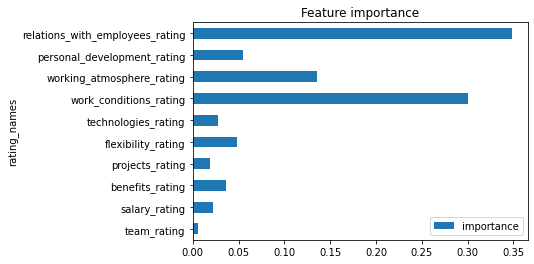

In [ ]:
import pandas as pd

forest_importances = pd.DataFrame({'rating_names': x_columns, 'importance':importances})



ax = forest_importances.plot.barh(x='rating_names', y='importance')
ax.legend(loc=4, prop={'size': 10})
ax.set_title("Feature importance")



In [ ]:
forest_importances

,rating_names,importance
0,team_rating,0.006265
1,salary_rating,0.021976
2,benefits_rating,0.036101
3,projects_rating,0.019335
4,flexibility_rating,0.048788
5,technologies_rating,0.027916
6,work_conditions_rating,0.300792
7,working_atmosphere_rating,0.135639
8,personal_development_rating,0.055170
9,relations_with_employees_rating,0.348018


### Discretization & Classification

In [ ]:
def categorize(x):
  if x < 1:
    return "NONE"
  elif x < 1.5:
    return "LOWEST"
  elif x < 2.5:
    return "LOW"
  elif x < 3.5:
    return "AVERAGE"
  elif x < 4.5:
    return "GOOD"
  else:
    return "BEST"

In [ ]:
# df_disc = df.loc[:, x_columns].apply(lambda x: categorize(x.val
# ))

## Task 7: Exploratory Analysis


### EDA Company Positions

#### Companies having positions in ML/DS (Serbia)

In [ ]:
a = df_ic[df_ic["offer"].str.contains("ML|MLE|Machine|Data Science")]["company"].to_numpy()
b = df_cp[df_cp['position_name'].str.contains("ML|MLE|Machine|Data Science")]["company"].to_numpy()
c = df_ic[df_ic["title"].str.contains("ML|MLE|Machine|Data Science")]["company"].to_numpy()

In [ ]:
set(np.concatenate((a,b,c)))

{'doob-innovation-studio',
 'endava',
 'fevo',
 'grid-dynamics',
 'htec',
 'jaggaer',
 'levi9-technology-services',
 'merkle',
 'microsoft-development-center-serbia',
 'nordeus',
 'ogranak-torchlight-technology-group-llc',
 'ogury-',
 'robert-bosch',
 'seven-bridges',
 'smartcat-',
 'synechron',
 'telenor',
 'telesign',
 'tymeshift',
 'umlaut',
 'vivify-ideas',
 'zuhlke-engineering'}

In [ ]:
df_cp_salary = df_cp.copy()
df_cp_salary["salary"] = df_cp_salary["salary_avg"].apply(lambda x: int(x.replace(" / h", "").replace(" EUR", "").replace(".","")))


#### Top 10 Junior Average Salaries

In [ ]:
df_cp_salary[df_cp_salary["position_name"].str.contains("Junior")].sort_values(by=["salary"], ascending=False)[:10]

,Unnamed: 0,company,position_name,salary_min,salary_max,salary_avg,salary
36,36,microsoft-development-center-serbia,Software Engineer (Junior),1.800,2.583,2.195 EUR,2195
483,483,decenter,Software Engineer (Junior),1.625,2.562,2.027 EUR,2027
548,548,daon,Ostalo (Junior),NaN,NaN,2.000 EUR,2000
741,741,tomtom,Software Engineer (Junior),NaN,NaN,1.800 EUR,1800
610,610,lotusflare,Software Engineer (Junior),1.625,1.825,1.725 EUR,1725
72,72,zuhlke-engineering,Project Manager (Junior),NaN,NaN,1.637 EUR,1637
1309,1309,quectel,Software Engineer (Junior),NaN,NaN,1.633 EUR,1633
825,825,symphony,Software Developer (Junior),NaN,NaN,1.600 EUR,1600
925,925,nordeus,Software Developer (Junior),NaN,NaN,1.541 EUR,1541
824,824,symphony,Software Engineer (Junior),1.500,1.600,1.533 EUR,1533


#### Top 10 Medior Average Salaries

In [ ]:
df_cp_salary[df_cp_salary["position_name"].str.contains("Medior")].sort_values(by=["salary"], ascending=False)[:10]

,Unnamed: 0,company,position_name,salary_min,salary_max,salary_avg,salary
37,37,microsoft-development-center-serbia,Software Engineer (Medior),3.683,4.333,3.908 EUR,3908
924,924,nordeus,Software Engineer (Medior),3.633,3.950,3.791 EUR,3791
926,926,nordeus,Technical Lead (Medior),NaN,NaN,3.750 EUR,3750
1207,1207,nutanix,Software Engineer (Medior),1.900,4.000,3.175 EUR,3175
2,2,doob-innovation-studio,Technical Lead (Medior),NaN,NaN,3.000 EUR,3000
627,627,avoss-media,Web Designer (Medior),NaN,NaN,2.761 EUR,2761
1170,1170,smartcat-,Data Science Engineer (Medior),2.500,2.862,2.681 EUR,2681
1119,1119,everseen,Technical Lead (Medior),NaN,NaN,2.600 EUR,2600
921,921,mvp-workshop,Software Engineer (Medior),NaN,NaN,2.516 EUR,2516
190,190,computer-rock,Ostalo (Medior),NaN,NaN,2.500 EUR,2500


#### Top 10 Senior Average Salaries

In [ ]:
df_cp_salary[df_cp_salary["position_name"].str.contains("Senior")].sort_values(by=["salary"], ascending=False)[:10]

,Unnamed: 0,company,position_name,salary_min,salary_max,salary_avg,salary
38,38,microsoft-development-center-serbia,Software Engineer (Senior),NaN,NaN,8.000 EUR,8000
484,484,decenter,Software Engineer (Senior),NaN,NaN,5.000 EUR,5000
395,395,ogury-,Technical Lead (Senior),NaN,NaN,4.537 EUR,4537
923,923,nordeus,Software Developer (Senior),3.450,5.583,4.516 EUR,4516
446,446,holycode,Product Manager (Senior),NaN,NaN,4.500 EUR,4500
1209,1209,nutanix,Software Developer (Senior),NaN,NaN,4.300 EUR,4300
1290,1290,htec,Delivery Manager (Senior),3.916,4.875,4.264 EUR,4264
563,563,hooloovoo,Software Engineer (Senior),3.500,5.000,4.250 EUR,4250
827,827,symphony,IT Manager (Senior),NaN,NaN,4.250 EUR,4250
1065,1065,hdl-design-house,Hardware Engineer (Senior),4.000,4.200,4.100 EUR,4100


### Company reviews

In [ ]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

stopwords = ['a','ako','ali','bi','bih','bila','bili','bilo','bio','bismo','biste','biti','bimo','da','do','duž','duz','ga','hoće','hoćemo','hoćete','hoćeš','hoću','hoce','hocemo','hocete','hoces','hocu','i','iako','ih','ili','iz','ja','je','jedna','jedne','jedno','jer','jesam','jesi','jesmo','jest','jeste','jesu','jim','joj','još','jos','ju','kada','kako','kao','koja','koje','koji','kojima','koju','kroz','li','me','mene','meni','mi','mimo','moj','moja','moje','mu','na','nad','nakon','nam','nama','nas','naš','naša','naše','našeg','nas','nasa','nase','naseg','ne','nego','neka','neki','nekog','neku','nema','neko','neće','nećemo','nećete','nećeš','neću','nešto','nece','necemo','necete','neces','necu','nesto','ni','nije','nikoga','niko','nisam','nisi','nismo','niste','nisu','njega','njegov','njegova','njegovo','njemu','njen','njena','njeno','njih','njihov','njihova','njihovo','njim','njima','njoj','nju','no','o','od','odmah','on','ona','oni','ono','ova','pa','pak','po','pod','pored','pre','s','sa','sam','samo','se','sebe','sebi','si','smo','ste','su','sve','svi','svog','svoj','svoja','svoje','svom','ta','tada','taj','tako','te','tebe','tebi','ti','to','toj','tome','tu','tvoj','tvoja','tvoje','u','uz','vam','vama','vas','vaš','vaša','vasa','vaše','vase','već','vec','vi','vrlo','za','zar','će','ce','ćemo','cemo','ćete','cete','ćeš','ces','ću','cu','što','sto','za','je','itd','od','do']

def get_dataframe():
  def preprocess(words):
      if not words:
        return ''
      tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                                reduce_len=True)
      words_tokens = tokenizer.tokenize(words)

      words_clean = []
      for word in words_tokens:
          if (word not in stopwords and word not in string.punctuation):  # remove punctuation
              words_clean.append(word)

      return ' '.join(words_clean)

  df_cc = pd.read_csv('./transform/comments.csv')
  df_cc = df_cc.drop('Unnamed: 0', axis=1)
  df_cc['positive'] = df_cc['positive'].fillna('')
  df_cc['negative'] = df_cc['negative'].fillna('')
  df_cc['projects'] = df_cc['projects'].fillna('')

  df_cc['positive'] = df_cc.apply(lambda row: preprocess(row['positive']),axis=1)
  df_cc['negative'] = df_cc.apply(lambda row: preprocess(row['negative']),axis=1)
  df_cc['projects'] = df_cc.apply(lambda row: preprocess(row['projects']),axis=1)

  return df_cc

def word_cloud(text):
  wordcloud = WordCloud(width=800, height=400, background_color="white").generate(str(text))
  plt.figure(figsize=(15,10))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()

Positive reviews word cloud

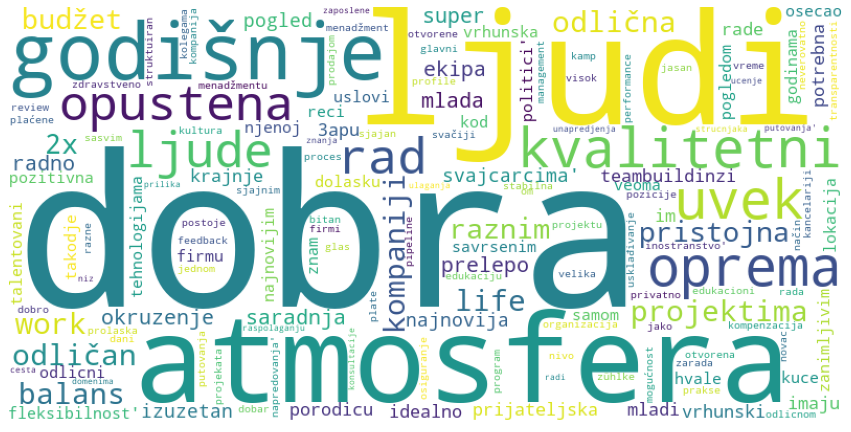

In [ ]:
df = get_dataframe()
word_cloud(df['positive'].values)

Negative reviews word cloud

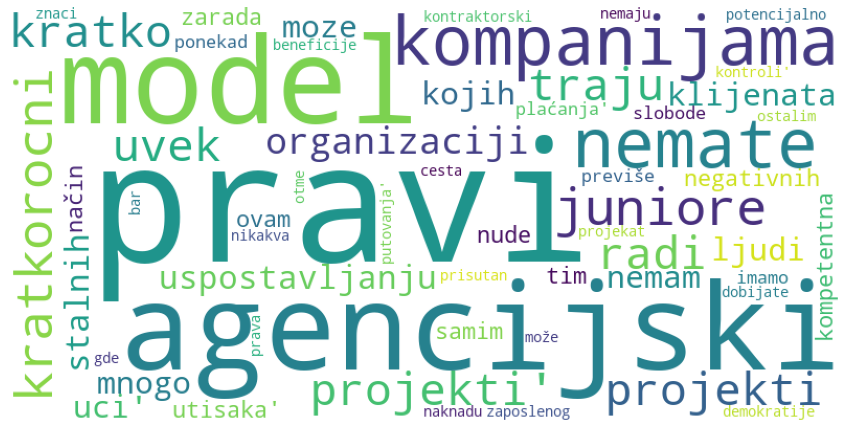

In [ ]:
word_cloud(df['negative'].values)

### Interview reviews

In [ ]:
df_ic = pd.read_csv("./transform/interview-comments.csv")
df_ic.head()

,Unnamed: 0,grade,date,title,hr_interview,technical_interview,offer_refusal_reason,offer,interview_year,company
0,0,1.0,18.10.2021,Izuzetno neprijatno,Što se tiče samog prvog kruga tj. HR intervju-...,Drugi krug je najčešće u vidu zadatka za koji ...,Poslednji krug razgovora je da vam se spusti v...,Software Engineer (odbio ponudu),Software Engineer (odbio ponudu),3ap
1,1,2.0,26.10.2019,Neprijatno,Intervju sa HR-om je bio ok i prijatan sve do ...,Korisnik nije naveo iskustvo sa tehničkog inte...,NaN,Software Engineer (nije dobio ponudu),Software Engineer (odbio ponudu),3ap
2,2,5.0,26.01.2022,Dobro iskustvo,"Prijatno iskustvo, HR iz Amerike. Nije bilo on...",Pricao sam sa komunikativnom i nasmejanom osob...,NaN,Ostalo (prihvatio ponudu),Intervju iz 2021. godine,3biilsoft-
3,3,5.0,13.10.2021,Koretno,"Ljubazan HR, proces je dinamičan, ne traje pre...",Prvi intervju je bio da ljudima iz beograda. H...,NaN,QA Specialist (prihvatio ponudu),Intervju iz 2021. godine,3biilsoft-
4,4,4.0,08.04.2021,Prijatna atmosfera i konkretna pitanja,Korisnik nije naveo iskustvo sa HR intervjua,Online intervju je bio zakazan ubrzo posle apl...,NaN,QA Specialist (nije dobio ponudu),Intervju iz 2021. godine,3biilsoft-


In [ ]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

stopwords = ['a','ako','ali','bi','bih','sta','bila','bili','bilo','bio','bismo','hr','om','mom','intervju','biste','biti','bimo','da','do','duž','duz','ga','hoće','hoćemo','hoćete','hoćeš','hoću','hoce','hocemo','hocete','hoces','hocu','i','iako','ih','ili','iz','ja','je','jedna','jedne','jedno','jer','jesam','jesi','jesmo','jest','jeste','jesu','jim','joj','još','jos','ju','kada','kako','kao','koja','koje','koji','kojima','koju','kroz','li','me','mene','meni','mi','mimo','moj','moja','moje','mu','na','nad','nakon','nam','nama','nas','naš','naša','naše','našeg','nas','nasa','nase','naseg','ne','nego','neka','neki','nekog','neku','nema','neko','neće','nećemo','nećete','nećeš','neću','nešto','nece','necemo','necete','neces','necu','nesto','ni','nije','nikoga','niko','nisam','nisi','nismo','niste','nisu','njega','njegov','njegova','njegovo','njemu','njen','njena','njeno','njih','njihov','njihova','njihovo','njim','njima','njoj','nju','no','o','od','odmah','on','ona','oni','ono','ova','pa','pak','po','pod','pored','pre','s','sa','sam','samo','se','sebe','sebi','si','smo','ste','su','sve','svi','svog','svoj','svoja','svoje','svom','ta','tada','taj','tako','te','tebe','tebi','ti','to','toj','tome','tu','tvoj','tvoja','tvoje','u','uz','vam','vama','vas','vaš','vaša','vasa','vaše','vase','već','vec','vi','vrlo','za','zar','će','ce','ćemo','cemo','ćete','cete','ćeš','ces','ću','cu','što','sto','za','je','itd','od','do']

def get_dataframe_ic():
  def preprocess(words):
      if not words:
        return ''
      tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                                reduce_len=True)
      words_tokens = tokenizer.tokenize(words)

      words_clean = []
      for word in words_tokens:
          if (word not in stopwords and word not in string.punctuation):  # remove punctuation
              words_clean.append(word)

      return ' '.join(words_clean)

  df_ic = pd.read_csv('./transform/interview-comments.csv')
  df_ic = df_ic.drop('Unnamed: 0', axis=1)

  df_ic['hr_interview'] = df_ic.apply(lambda row: preprocess(row['hr_interview']),axis=1)
  df_ic['technical_interview'] = df_ic.apply(lambda row: preprocess(row['technical_interview']),axis=1)

  return df_ic

def word_cloud(text):
  wordcloud = WordCloud(width=800, height=400, background_color="white").generate(str(text))
  plt.figure(figsize=(15,10))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()

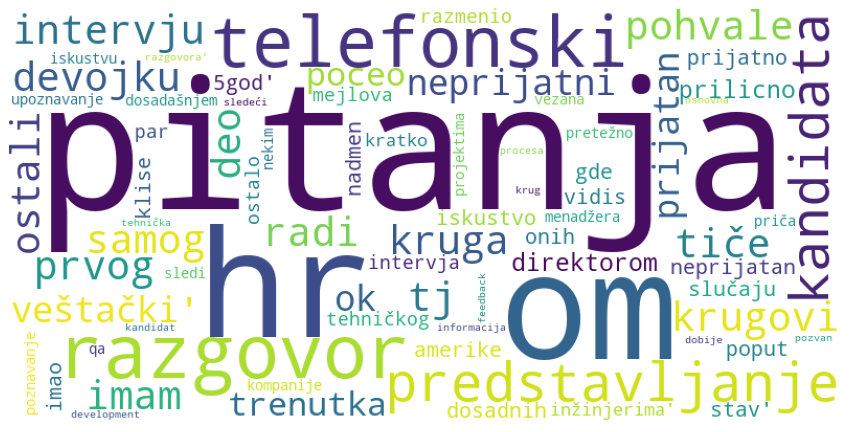

In [ ]:
df_ic = get_dataframe_ic()
word_cloud(df_ic['hr_interview'].values)

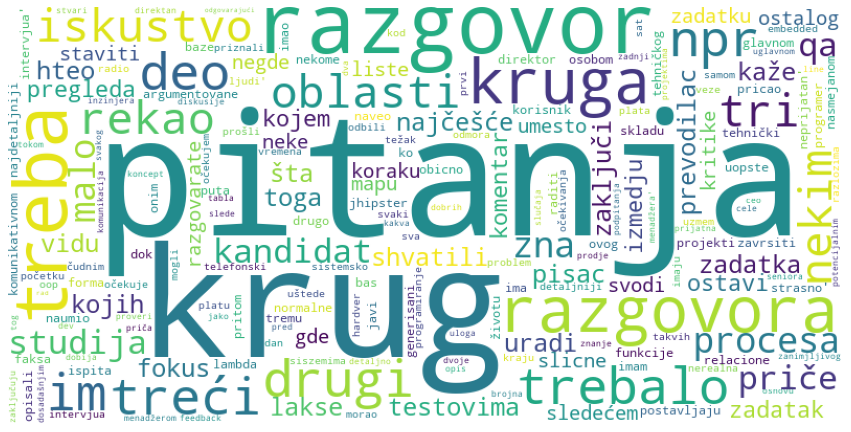

In [ ]:
word_cloud(df_ic['technical_interview'].values)

In [ ]:
df_ic = pd.read_csv("./transform/interview-comments.csv")
d = {}
for index, row in df_ic.iterrows():
  if row['company'] not in d:
    d[row['company']] = {'grade': []}
  d[row['company']]['grade'].append(row['grade'])
res = {}
for k, v in d.items():
  if len(v['grade']) >= 10:
    res[k] = {'grade': round(sum(v['grade']) / len(v['grade']),2)}

nd = pd.DataFrame.from_dict(res, orient='index')

Top 10 najbolje ocenjenih kompanija

In [ ]:
nd.sort_values(by=['grade'], ascending=False).head(10)

,grade
sa.global,5.00
endava,4.41
osm,4.36
ccbill,4.35
zuhlke-engineering,4.33
fishingbooker,4.33
nul-tien,4.33
engineering-software-lab,4.33
vega-it-sourcing,4.32
itekako,4.25


Top 10 najgore ocenjenih kompanija

In [ ]:
nd.sort_values(by=['grade'], ascending=True).head(10)

,grade
fis,2.73
menu-technologies,2.80
3biilsoft-,2.82
telenor,2.92
vivify-ideas,3.07
get,3.12
lotusflare,3.15
wireless-media,3.15
blackrock-(formerly-efront),3.20
telesign,3.25
